In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/WineQT.csv")

In [15]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8       

In [34]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [35]:
X = X.fillna(X.mean())

In [36]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.4847161572052402
Accuracy: 48.47%


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

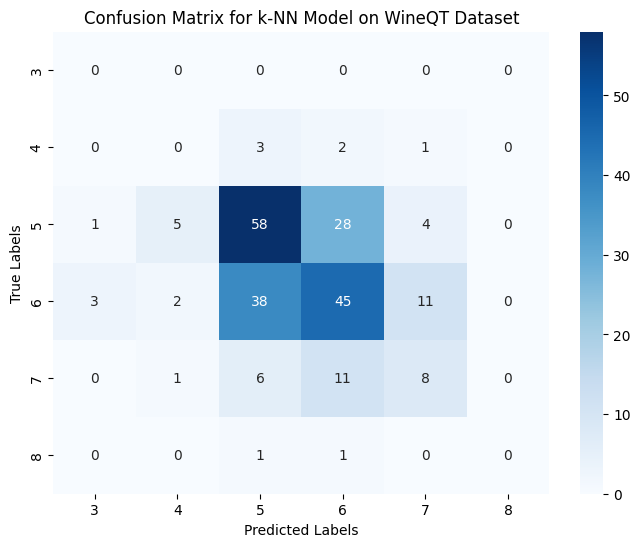

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for k-NN Model on WineQT Dataset")
plt.show()